# 2D Hyperparameter Tuning for Fuzzy C-Means

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler')
    .as_posix()
)

os.chdir(path)
sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

from constant import PICKLE, TUNING
from datatype.dataset import Dataset
from fcmeans import FCM
from textwrap import dedent

In [ ]:
plt.style.use('science')

In [3]:
pd.set_option('display.max_colwidth', None)

In [5]:
dataset = Dataset('segment')
dataframe = dataset.load()

In [6]:
x = np.array(
    [
        dataframe.umap_x_2d,
        dataframe.umap_y_2d
    ]
).transpose()

In [7]:
amount = np.arange(start=2, stop=27, step=1)
models = []

total = amount.size

for n_clusters in amount:
    print(f"Processing: {n_clusters}/{total}")
    
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(x)
    models.append(fcm)

Processing: 2/25
Processing: 3/25
Processing: 4/25
Processing: 5/25
Processing: 6/25
Processing: 7/25
Processing: 8/25
Processing: 9/25
Processing: 10/25
Processing: 11/25
Processing: 12/25
Processing: 13/25
Processing: 14/25
Processing: 15/25
Processing: 16/25
Processing: 17/25
Processing: 18/25
Processing: 19/25
Processing: 20/25
Processing: 21/25
Processing: 22/25
Processing: 23/25
Processing: 24/25
Processing: 25/25
Processing: 26/25


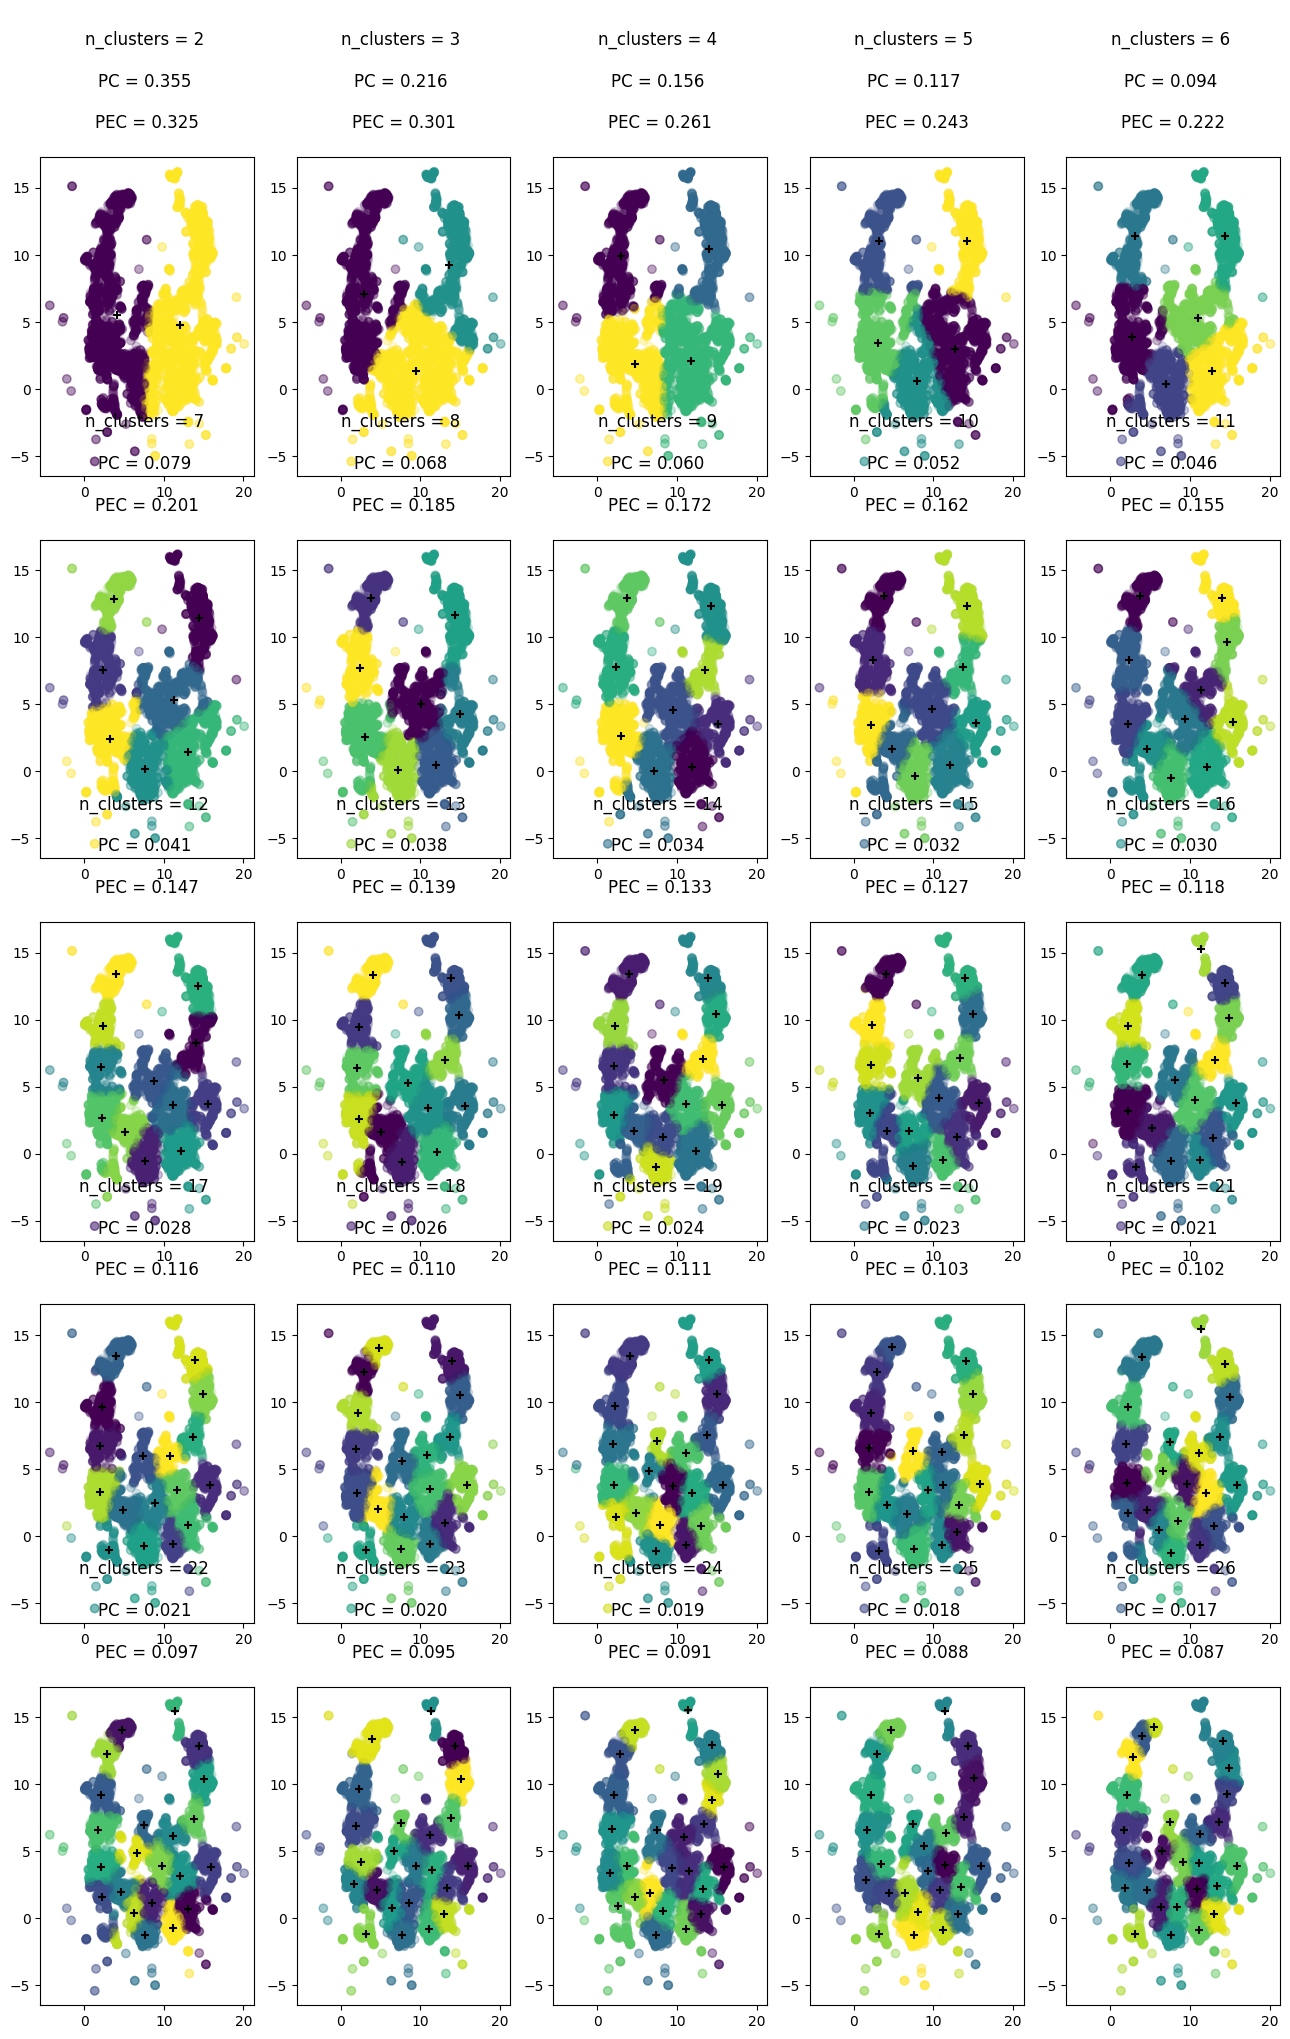

In [22]:
num_clusters = len(amount)

rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))

fig, axes = plt.subplots(
    rows, 
    cols, 
    figsize=(16, 24)
)

u = {}
results = []

for n_clusters, model, axe in zip(amount, models, axes.ravel()):
    template = {}

    # Find the highest partition coefficient (PC) 
    pc = model.partition_coefficient
    
    # Find the lowest partition entropy coefficient (PEC)
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(x)
    
    u[n_clusters] = list(model.u)
    
    template['n_clusters'] = n_clusters
    template['partition_coefficient'] = pc
    template['partition_entropy_coefficient'] = pec
    template['difference'] = pec - pc
    
    axe.scatter(
        x[:, 0], 
        x[:, 1],
        c=fcm_labels, 
        alpha=0.1
    )
    
    axe.scatter(
        fcm_centers[:, 0], 
        fcm_centers[:, 1],
        marker='+', 
        c='black'
    )
    
    title = dedent(
        f"""
        n_clusters = {n_clusters} \n 
        PC = {pc:.3f} \n 
        PEC = {pec:.3f}
        """
    )
    
    axe.set_title(title)
    
    results.append(template)

In [23]:
path = TUNING.joinpath('n_cluster_fuzzy_2d.png')
    
fig.tight_layout(pad=5.0)

fig.savefig(
    path,
    dpi=300,
    format='png'
)

plt.close()

In [24]:
membership = pd.DataFrame.from_dict(u)
scoring = pd.DataFrame.from_dict(results)

In [25]:
ascending = [
    False
]

scores = [
    'difference',
]

scoring.sort_values(
    scores, 
    ascending=ascending, 
    inplace=True
)

In [27]:
path = TUNING.joinpath('membership_fuzzy_2d.xlsx')
membership.to_excel(path, sheet_name='membership_fuzzy_2d')

path = TUNING.joinpath('scoring_fuzzy_2d.xlsx')
scoring.to_excel(path, sheet_name='scoring_fuzzy_2d')

path = TUNING.joinpath('scoring_fuzzy_2d.html')
scoring.to_html(path)

In [28]:
scoring.head(1)

,n_clusters,partition_coefficient,partition_entropy_coefficient,difference
4,6,0.093908,0.222145,0.128237


In [29]:
best = scoring.head(1)

In [30]:
n_clusters = best.n_clusters.squeeze()

In [31]:
fcm = FCM(n_clusters=n_clusters)
fcm.fit(x)

In [32]:
centers = fcm.centers
labels = fcm.predict(x)

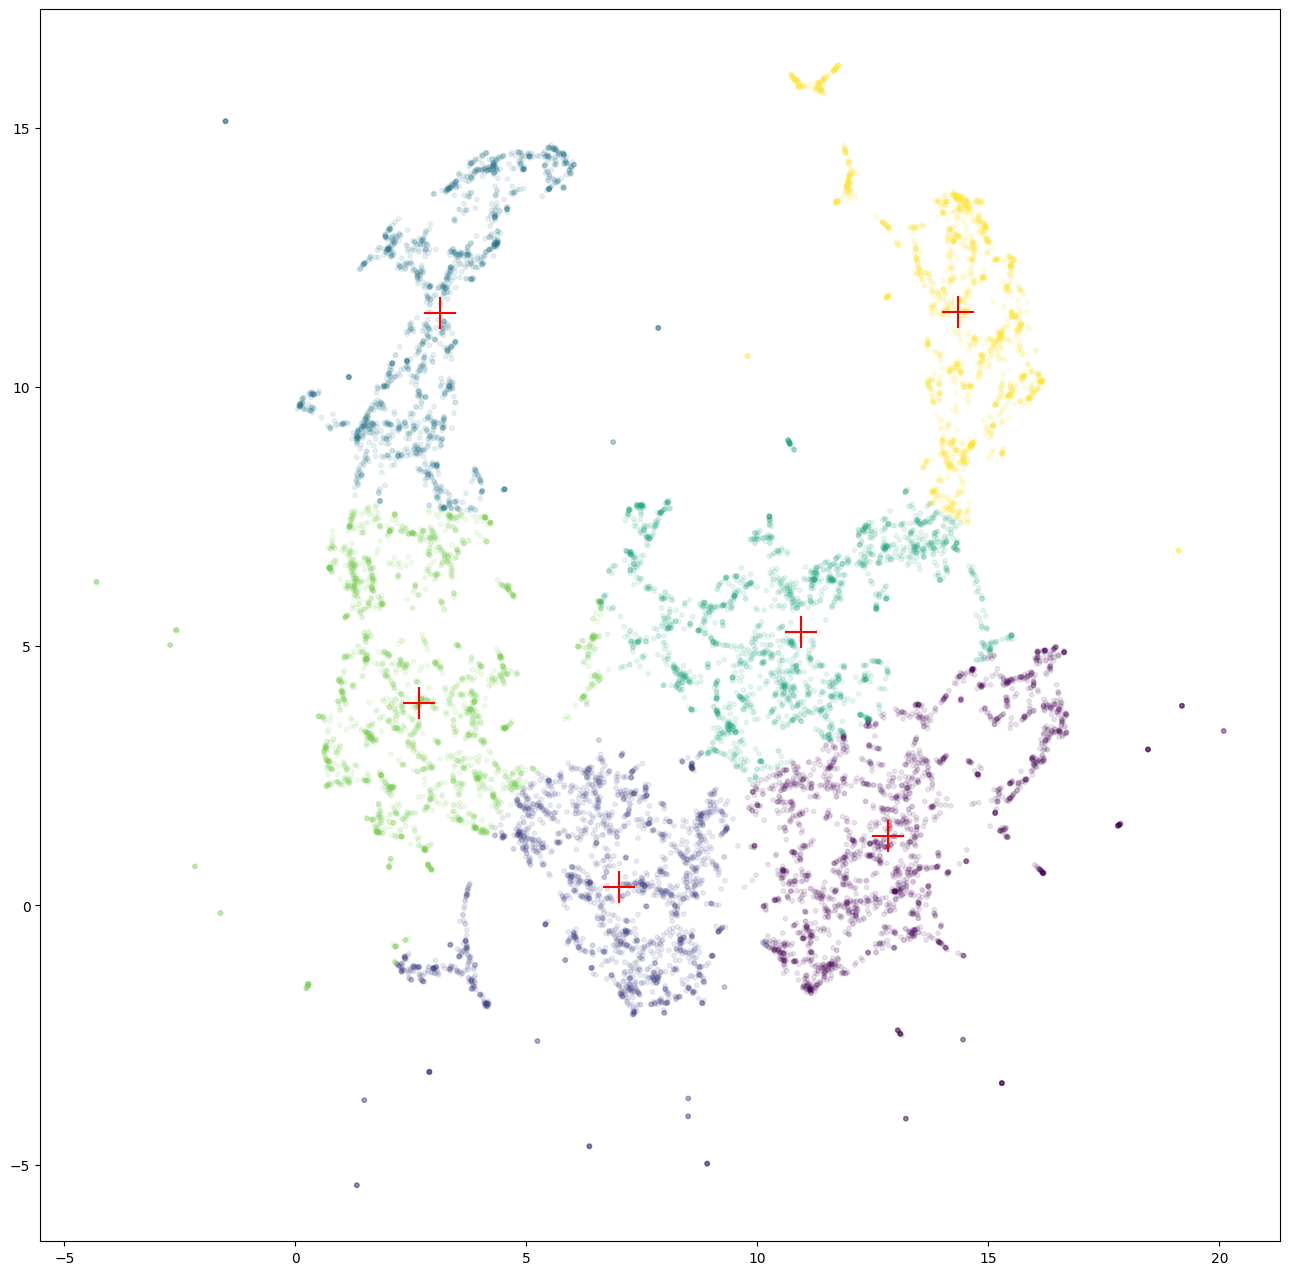

In [33]:
fig, ax = plt.subplots(
    figsize=(16, 16)
)

ax.scatter(
    x[:, 0], 
    x[:, 1], 
    c=labels, 
    s=10,
    alpha=0.10
)

ax.scatter(
    centers[:, 0], 
    centers[:, 1], 
    marker='+', 
    s=500, 
    c='red'
)

In [34]:
path = TUNING.joinpath('center_fuzzy_2d.png')

fig.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

plt.close()